# Homework 4 | BAIS:6100

**10 Points**

## Module 7

"EightProducts.csv" contains customer reviews on eight electronic products in Amazon. The reviews are in column "Review" and the product names are in column "Product." The following code loads the data and shows the name and the number of reviews of each product. 

In [1]:
import pandas as pd
df = pd.read_csv("classdata/EightProducts.csv",encoding='latin=1')
print(df.Product.value_counts())
df.head()

Apex AD2600 Progressive-scan DVD player      99
Creative Labs Nomad Jukebox Zen Xtra 40GB    95
Canon S100                                   51
MicroMP3                                     50
Nokia 6600                                   49
Canon G3                                     45
Nokia 6610                                   41
Nikon coolpix 4300                           34
Name: Product, dtype: int64


,Product,Review
0,Apex AD2600 Progressive-scan DVD player,troubleshooting ad-2500 and ad-2600 no pictur...
1,Apex AD2600 Progressive-scan DVD player,incredibe price / performance . \n i 've owne...
2,Apex AD2600 Progressive-scan DVD player,"doesnt play new disney movies . \nplay , disn..."
3,Apex AD2600 Progressive-scan DVD player,poor quality - problem with dual-layer dvd 's...
4,Apex AD2600 Progressive-scan DVD player,has destroyed several of my dvds and cds . \n...


1.a. (0.5 points) Create a DTM using the customer reviews in the provided data. Follow the instructions below: 

- Use the default tokenizer from sklearn library. 
- Remove stop words in the list of nltk. 
- Stem the tokens using the SnowBall stemmer from nltk. 
- Create DTM with TF score and unigram.

Save your DTM as a variable **DTM**. 

In [2]:
#Your answer here:
from sklearn.feature_extraction.text import CountVectorizer
import nltk       

nltk_stopwords = nltk.corpus.stopwords.words("english") 
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords)
DTM =vectorizer.fit_transform(df['Review'])

#Check your answer:
DTM.shape

(464, 4569)

1.b. (0.5 points) Plot the perplexity score against the number of topics of a LDA model built on the DTM from question 1.a. You need to plot the numbers of topics from 2 to 6. Set the parameters of your LDA model as follows:

 - n_jobs=-1
 - max_iter=100
 - random_state=2021

2
3
4
5
6


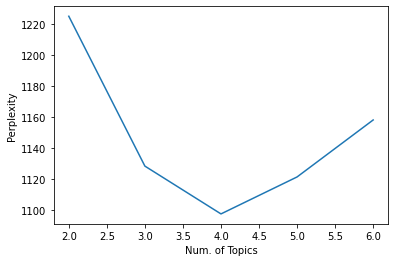

In [3]:
#Your answer here:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import LatentDirichletAllocation  #LDA module from sklearn. 

lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=100,   
                                random_state=2021 
                               )

num_topics=[2,3,4,5,6]
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))


plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')
#Check your answer:
plt.show()

1.c (0.5 point) According to the plot in question 1.b, use the Elbow method to determine the number of topics of the LDA model. Build the LDA model using the DTM from question 1.a. Set the parameters of your LDA model as in question 1.b. Save your LDA model as a variable called **lda** and print the perplexity score.

In [4]:
#Your answer here:
lda = LatentDirichletAllocation(n_components=4,
                                n_jobs=-1,   
                                max_iter=100,   
                                random_state=2021 
                               )
lda.fit(DTM)
#Check your answer
lda.perplexity(DTM)

1097.7310190035857

1.e. (1 point) Create the term-topic matrix for the LDA model you created in question 1.d. Save term-topic matrix as a data frame called **TTopicM**. Identify the ten most likely words under each topic and save them as columns in a data frame called **TermOfTopic**. 

In [5]:
#Your answer here:
from sklearn import preprocessing
import numpy as np
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names_out())
TermOfTopic =pd.DataFrame([])
for i in range(4):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
    
#Check your answer
display(TTopicM.head())
display(TermOfTopic)

,0,1,2,3
00,0.000024,0.000170,0.00002,0.000031
000,0.000218,0.000369,0.00002,0.000031
00000001,0.000025,0.000010,0.00010,0.000031
022,0.000024,0.000050,0.00002,0.000031
03,0.000120,0.000010,0.00002,0.000403


,0,1,2,3
0,phone,player,camera,player
1,use,use,pictur,dvd
2,nokia,softwar,use,play
3,featur,zen,digit,apex
4,mobil,ipod,batteri,one
5,one,sound,take,work
6,great,batteri,qualiti,get
7,batteri,creativ,mode,tri
8,bluetooth,get,great,problem
9,good,one,g3,custom


1.f. (0.5 point) According to **TermOfTopic** in the previous question, describe each topic in a few words.

**Your answer here:**

0 - Cellphones

1 - mp3 player

2 - camera

3 - DVD Player


1.d. (1 point) Print the product names (column **'Product'**) of the ten reviews that are most related to topic "camera".  

In [6]:
#Your answer here:
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df, DTopicM], axis=1)
#Chek your answer
dfnew.sort_values(by=2,ascending=False)['Product'].head(10)

116              Canon G3
140              Canon G3
363    Nikon coolpix 4300
119              Canon G3
123              Canon G3
136              Canon G3
175            Canon S100
347    Nikon coolpix 4300
146            Canon S100
178            Canon S100
Name: Product, dtype: object

## Module 8

"8senators_Sep17.csv" contains the tweets from the Twitter accounts of eight US senators (four democrats and four republicans) posted in Sep 2017. The following code reads the data, cleans the data, shows the Twitter IDs, and shows the first five rows of the data frame. 

You have two tasks. One is to compare the (relative) frequencies of the terms used in the tweets by the four democrats as a group and by the four republicans as a group. The other is to create the text network to visiualize the connections between the terms and the eight senators' twitter IDs.  

In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df = pd.read_csv("classdata/8senators_Sep17.csv")
df["text"]=df["text"].str.replace("@\S+", " ", regex=True)  #Remove username mentioned
df["text"]=df["text"].str.replace("http\S+", " ", regex=True)  #Remove URLs
df["text"]=df["text"].str.replace('\$\d+[\d,\.]*', "moneytoken", regex=True) #replace dollar amount by a token
print(df["user"].value_counts())
df[["created_at","user","text","party"]].head()

SenWhitehouse     337
senrobportman     326
SenRubioPress     326
senorrinhatch     322
SenTedCruz        302
SenBobCasey       271
SenJeffMerkley    266
SenCortezMasto    260
Name: user, dtype: int64


,created_at,user,text,party
0,2017-09-29 19:14:00,SenBobCasey,Via Trump tax plan gives 97.5% of the to...,D
1,2017-09-29 19:08:00,SenBobCasey,Just take a look at this graph. Who would you ...,D
2,2017-09-29 19:06:00,SenBobCasey,Because the also eliminate the individua...,D
3,2017-09-29 19:01:00,SenBobCasey,Page 4: the top 1% (those making more than mon...,D
4,2017-09-29 18:55:00,SenBobCasey,"Instead of helping the middle class, this plan...",D


2.a (0.5 point) Create the DTM for the tweets posted by the four democrats (the rows with df.party=="D") based on the following requirements:

   - Use the default tokenizer from sklearn library. 
   - Remove stop words in the list of nltk. 
   - Don't stem tokens.
   - Create DTM with TF scores.
   - Use only bigrams in vocabulary.

Save it as a variable called **DTM1**. Calculuate the total frequency of each unique term. Save your output as a two-column data frame called **dffreq1**, in which the terms are given in column "Term" and their total frequencies are given in column "Frequency". Sort **dffreq1** by the total frequencies in a descending order and reset the row index. Print the first five rows of **dffreq1**.

In [8]:
#You answer here:
from sklearn.feature_extraction.text import CountVectorizer
import nltk  
nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer = CountVectorizer(stop_words=nltk_stopwords,ngram_range=(2,2))
DTM1 =vectorizer.fit_transform(df[df.party=="D"]["text"])
dffreq1 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM1.sum(axis=0).tolist()[0]
                  })
dffreq1.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq1.reset_index(inplace=True,drop=True)
#Check your answer
dffreq1.head()

,Term,Frequency
0,health care,74
1,graham cassidy,41
2,moneytokenm cuts,31
3,trumpcare bill,31
4,oppose moneytokenm,29


2.b (0.5 point) Repeat your solution for question 2.a but, this time, create the DTM and the table of total frequency for the tweets posted by the four republicon (the rows with df.party=="R"). Save the DTM as a variable called **DTM2** and the table of total frequency as **dffreq2**. Print the first five rows of **dffreq2**.

In [9]:
#You answer here:
DTM2 =vectorizer.fit_transform(df[df.party=="R"]["text"])
dffreq2 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM2.sum(axis=0).tolist()[0]
                  })
dffreq2.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq2.reset_index(inplace=True,drop=True)
#Check your answer:
dffreq2.head()

,Term,Frequency
0,middle class,23
1,sex traffickers,15
2,women children,14
3,sex trafficking,14
4,tax code,14


2.c (0.5 point) Merge **dffreq1** and **dffreq2** into one data frame based on the terms they have in common in column **Term**. Save the merged data frame as **dfall**. Normalize **'Frequency_x'** by dividing each frequency by the column sum of 'Frequency_x'. Similarly, normalize **'Frequency_y'** by dividing each frequency by the column sum of 'Frequency_y'. Print the first five rows of **dfall**.

In [10]:
#Your answer here:
dfall = pd.merge(dffreq1, dffreq2, on="Term")
dfall['Frequency_x']=dfall['Frequency_x']/dfall['Frequency_x'].sum()
dfall['Frequency_y']=dfall['Frequency_y']/dfall['Frequency_y'].sum()
#Check your answer:
dfall.head()

,Term,Frequency_x,Frequency_y
0,health care,0.102921,0.001425
1,graham cassidy,0.057024,0.005698
2,tax plan,0.031989,0.007123
3,middle class,0.029207,0.032764
4,puerto rico,0.018081,0.015670


2.d (0.5 point) Create a new column in **dfall** called **'Frequency_total'**, which is the sum of (normalized) columns **'Frequency_x'** and **'Frequency_y'**. Then sort **dfall** by **'Frequency_total'** in the descending order and reset the row index. Print the first five rows of **dfall**.


In [11]:
#Your answer here:
dfall['Frequency_total'] = dfall['Frequency_x'] + dfall['Frequency_y']
dfall.sort_values(by="Frequency_total",ascending=False,inplace=True)
dfall.reset_index(drop=True,inplace=True)
#Check your answer:
dfall.head()

,Term,Frequency_x,Frequency_y,Frequency_total
0,health care,0.102921,0.001425,0.104345
1,graham cassidy,0.057024,0.005698,0.062722
2,middle class,0.029207,0.032764,0.061971
3,tax plan,0.031989,0.007123,0.039111
4,puerto rico,0.018081,0.015670,0.033750


2.e (0.5 point) Create a bar chart to compare the normalized term frequencies (also called relative term frequencies) of the tweets posted by the democrats (as a group) and the republicans (as a group). You only need to plot the top 20 bigrams in **dfall** from question 2.d, which should have been sorted by **Frequency_total**. You can create the bar chart in any style you like but, in the legend, you need to label the bars by 'Democrat' and 'Republican'.

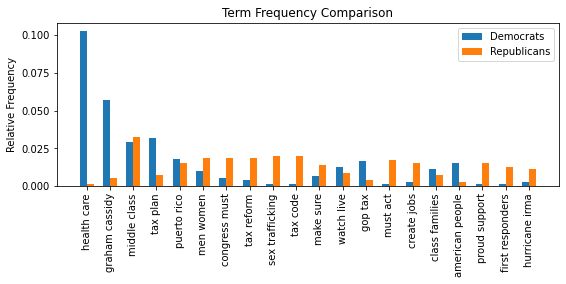

In [12]:
#You answer here:
import numpy as np
top = 20
x = np.arange(top)  # the x ticks (terms) locations
width = 0.3         # the width of the bars

plt.rcParams['figure.figsize'] = [9, 3] #This sets the size of the plot.
fig, ax = plt.subplots()
ax.bar(x - width/2, dfall.Frequency_x[0:top], width, label='Democrats')
ax.bar(x + width/2, dfall.Frequency_y[0:top], width, label='Republicans')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Frequency')
ax.set_title('Term Frequency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(dfall.Term[0:top])
ax.legend()
plt.xticks(rotation=90)
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)   # fontsize of the figure title
plt.show()

#Check your answer:
plt.show()

2.f (1 point) Create a scatter plot to compare the normalized term frequencies of the tweets posted by the democrats (in X-axis) and the republicans (in Y-axis). In particular, each bigram must be positioned in the plot using 'Frequency_x' and 'Frequency_y' as its X and Y coordiantes.  You only need to plot the top 20 bigrams in dfall from question 2.c. You can create the plot in any style you like. Make sure each dot must be annotated by the bigram it represents. You must set **plt.xlim(0.0,  0.04)** and **plt.ylim(0.0,  0.04)** and must create a 45-degree reference line.

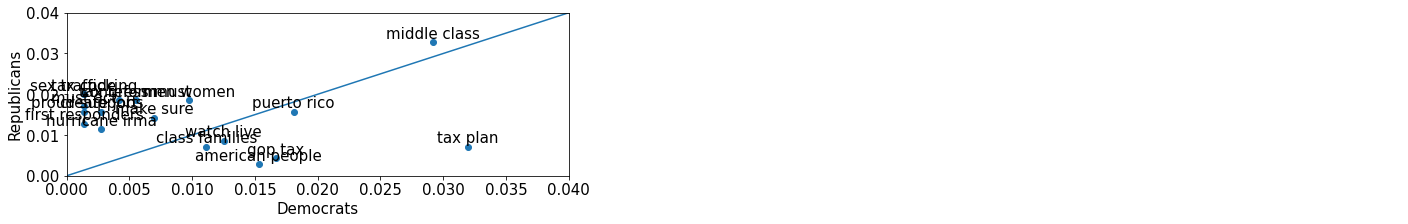

In [13]:
#Your answer here:
top = 20
plt.scatter(dfall.Frequency_x[0:top],dfall.Frequency_y[0:top])  #Scatter plot
for i in range(0,top):
    plt.annotate(dfall.Term[i],          # this is the text
             (dfall.Frequency_x[i],dfall.Frequency_y[i]), # this is the data point to label
             textcoords="offset points", # how to position the text
             xytext=(0,4),               # distance from text to points (x,y)
             ha='center')                # horizontal alignment can be left, right or center
plt.plot([0,0.04], [0,0.04], label='linear')
plt.xlim(0.00,  0.04)
plt.ylim(0.00,  0.04)
plt.xlabel('Democrats')
plt.ylabel('Republicans')
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)   # fontsize of the figure title
plt.rcParams['figure.figsize'] = [6, 6] #This sets the size of the plot.
plt.show()
#Check your answer:
plt.show()

2.g (0.5 point) Suppose you want to visiualize the connections between the terms and the senators' twitter IDs. Create a **corpus** object directly from  the csv file "classdata/8senators_Sep17.csv". Print **corpus.tokenized()**.

In [14]:
#Your answer here:
from textnets import Corpus, Textnet
from textnets import examples
corpus = Corpus.from_csv("classdata/8senators_Sep17.csv", 
                         doc_col='text',
                         label_col='user')

#Check your answer
corpus.tokenized().head()

/home/abromeland/.local/lib/python3.9/site-packages/textnets/corpus.py:504: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.nlp.map(func).apply(pd.Series).reset_index(),


,term,n,term_weight
label,,,
SenBobCasey,$,17,0.129348
SenCortezMasto,$,13,0.122592
SenJeffMerkley,$,12,0.120576
SenRubioPress,$,1,0.057992
SenWhitehouse,$,73,0.166050


2.h (1 points) Create a text network from **corpus** created in question 2.f based on the following requirements.

   - Only visualize the terms whose frequency (in column "n") is at least 25 and weight (in column "term_weight") is positive.
   - Set show_clusters to False.
   - Set label_term_nodes, label_doc_nodes, and color_clusters to True.
   
You can set other parameters in anyway you like as long as the plot is shown in an appropriate size. An example of the network can be found in "classdata/8senators_Sep17.png" in IDAS.   

/home/abromeland/.local/lib/python3.9/site-packages/textnets/corpus.py:504: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.nlp.map(func).apply(pd.Series).reset_index(),
/home/abromeland/.local/lib/python3.9/site-packages/textnets/corpus.py:504: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.nlp.map(func).apply(pd.Series).reset_index(),
/home/abromeland/.local/lib/python3.9/site-packages/textnets/corpus.py:504: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.nlp.map(func).apply(pd.Series).reset_index(),


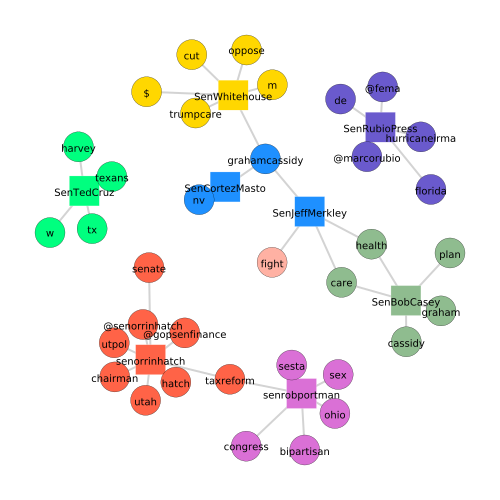

In [15]:
#Your answer here:
import random 
random.seed(2021) #Fix random seed for reproducibility
tn = Textnet(corpus.tokenized()[(corpus.tokenized().n>=25) & (corpus.tokenized().term_weight>0)], min_docs=1)
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        color_clusters=True,
        show_clusters=False, 
        vertex_size=30,
        vertex_label_size=10,
        bbox=[500,500])


2.i. (0.5 point) Create a one-mode text network from the network you created in question 2.h by projecting it to the document (group) nodes. Here, each document/group is a twitter ID of a senate. The remaining requirements are the same as in question 2.h. 

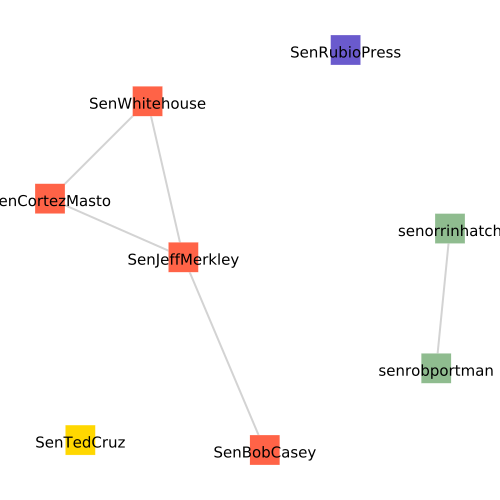

In [16]:
#Your answer here
import random 
random.seed(2021) #Fix random seed for reproducibility
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True,
            color_clusters=True,
            show_clusters=False,
            vertex_size=30,
            vertex_label_size=15,
            bbox=[500,500])


2.j.  (0.5 point) Create a one-mode text network from the network you created in question 2.h by projecting it to the term nodes. The remaining requirements are the same as in question 2.h.

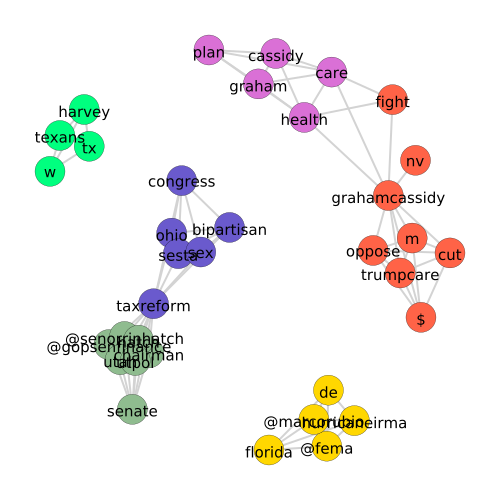

In [17]:
#Your answer here
import random 
random.seed(2021) #Fix random seed for reproducibility
papers = tn.project(node_type='term')
papers.plot(label_nodes=True,
            color_clusters=True,
            show_clusters=False,
            vertex_size=30,
            vertex_label_size=15,
            bbox=[500,500])
